##Gotta make sure you are using gpus

how meta!

<img src="http://g.recordit.co/eJsabFvf4E.gif" style="width: 10px;">

In [1]:
# where am I?
!ls 

datalab  workdir


In [2]:
# need order
!mkdir -p workdir
%cd workdir

/content/workdir


In [0]:
from google.colab import auth
auth.authenticate_user()

In [4]:
# gcs setting
project_id = 'fastai-colab'
!gcloud config set project {project_id}

Updated property [core/project].


In [5]:
# get me some data
#!mkdir -p data
#!gsutil cp gs://fastai-colab/datasets/dogscats.zip data/dogscats.zip
#!unzip data/dogscats.zip -d data/

mkdir: cannot create directory ‘data’: File exists


In [8]:
!pwd

/content


In [0]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [9]:
# get terminator
!pip install fastai

In [1]:
# may not be necessary
!apt-get install -y libtiff5-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtiff5-dev is already the newest version (4.0.8-5).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [2]:
# on some of the VMs PIL is borked
# I am doing this out of abundance of caution
!pip install --no-cache-dir -I pillow

    100% |████████████████████████████████| 5.9MB 76.6MB/s 


In [0]:
#%reload_ext autoreload        <-------------- DO NOT USE 
#%autoreload 0                 <-------------- SAME SAME
%matplotlib inline

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
PATH = "data/dogscats/"
sz=224

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [11]:
#
!mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/
#
os.listdir(PATH)

--2018-02-27 19:05:22--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  43.8MB/s    in 20s     

2018-02-27 19:05:42 (41.0 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.j


  inflating: data/dogscats/train/cats/cat.4194.jpg  
  inflating: data/dogscats/train/cats/cat.5577.jpg  
  inflating: data/dogscats/train/cats/cat.8111.jpg  
  inflating: data/dogscats/train/cats/cat.5634.jpg  
  inflating: data/dogscats/train/cats/cat.5699.jpg  
  inflating: data/dogscats/train/cats/cat.8052.jpg  
  inflating: data/dogscats/train/cats/cat.4496.jpg  
  inflating: data/dogscats/train/cats/cat.7958.jpg  
  inflating: data/dogscats/train/cats/cat.5478.jpg  
  inflating: data/dogscats/train/cats/cat.11692.jpg  
  inflating: data/dogscats/train/cats/cat.12102.jpg  
  inflating: data/dogscats/train/cats/cat.4775.jpg  
  inflating: data/dogscats/train/cats/cat.3772.jpg  
  inflating: data/dogscats/train/cats/cat.2926.jpg  
  inflating: data/dogscats/train/cats/cat.513.jpg  
  inflating: data/dogscats/train/cats/cat.1219.jpg  
  inflating: data/dogscats/train/cats/cat.6939.jpg  
  inflating: data/dogscats/train/cats/cat.6642.jpg  
  inflating: data/dogscats/train/cats/cat.23


  inflating: data/dogscats/train/cats/cat.553.jpg  
  inflating: data/dogscats/train/cats/cat.11575.jpg  
  inflating: data/dogscats/train/cats/cat.10341.jpg  
  inflating: data/dogscats/train/cats/cat.12345.jpg  
  inflating: data/dogscats/train/cats/cat.12182.jpg  
  inflating: data/dogscats/train/cats/cat.7113.jpg  
  inflating: data/dogscats/train/cats/cat.5857.jpg  
  inflating: data/dogscats/train/cats/cat.6074.jpg  
  inflating: data/dogscats/train/cats/cat.3389.jpg  
  inflating: data/dogscats/train/cats/cat.2268.jpg  
  inflating: data/dogscats/train/cats/cat.8674.jpg  
  inflating: data/dogscats/train/cats/cat.10941.jpg  
  inflating: data/dogscats/train/cats/cat.6264.jpg  
  inflating: data/dogscats/train/cats/cat.7211.jpg  
  inflating: data/dogscats/train/cats/cat.8344.jpg  
  inflating: data/dogscats/train/cats/cat.1162.jpg  
  inflating: data/dogscats/train/cats/cat.8680.jpg  
  inflating: data/dogscats/train/cats/cat.1914.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/cats/cat.8408.jpg  
  inflating: data/dogscats/train/cats/cat.2911.jpg  
  inflating: data/dogscats/train/cats/cat.2462.jpg  
  inflating: data/dogscats/train/cats/cat.8984.jpg  
  inflating: data/dogscats/train/cats/cat.9279.jpg  
  inflating: data/dogscats/train/cats/cat.7964.jpg  
  inflating: data/dogscats/train/cats/cat.8043.jpg  
  inflating: data/dogscats/train/cats/cat.3642.jpg  
  inflating: data/dogscats/train/cats/cat.11455.jpg  
  inflating: data/dogscats/train/cats/cat.5541.jpg  
  inflating: data/dogscats/train/cats/cat.7387.jpg  
  inflating: data/dogscats/train/cats/cat.5509.jpg  
  inflating: data/dogscats/train/cats/cat.4422.jpg  
  inflating: data/dogscats/train/cats/cat.4571.jpg  
  inflating: data/dogscats/train/cats/cat.8465.jpg  
  inflating: data/dogscats/train/cats/cat.9210.jpg  
  inflating: data/dogscats/train/cats/cat.4097.jpg  
  inflating: data/dogscats/train/cats/cat.3612.jpg  
  inflating: data/dogscats/train/cats/cat.109


  inflating: data/dogscats/train/cats/cat.4146.jpg  
  inflating: data/dogscats/train/cats/cat.11833.jpg  
  inflating: data/dogscats/train/cats/cat.396.jpg  
  inflating: data/dogscats/train/cats/cat.10378.jpg  
  inflating: data/dogscats/train/cats/cat.7647.jpg  
  inflating: data/dogscats/train/cats/cat.6782.jpg  
  inflating: data/dogscats/train/cats/cat.7520.jpg  
  inflating: data/dogscats/train/cats/cat.10640.jpg  
  inflating: data/dogscats/train/cats/cat.7207.jpg  
  inflating: data/dogscats/train/cats/cat.10212.jpg  
  inflating: data/dogscats/train/cats/cat.12342.jpg  
  inflating: data/dogscats/train/cats/cat.4135.jpg  
  inflating: data/dogscats/train/cats/cat.7789.jpg  
  inflating: data/dogscats/train/cats/cat.11313.jpg  
  inflating: data/dogscats/train/cats/cat.3216.jpg  
  inflating: data/dogscats/train/cats/cat.294.jpg  
  inflating: data/dogscats/train/cats/cat.6542.jpg  
  inflating: data/dogscats/train/cats/cat.6102.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/cats/cat.12181.jpg  
  inflating: data/dogscats/train/cats/cat.7261.jpg  
  inflating: data/dogscats/train/cats/cat.6274.jpg  
  inflating: data/dogscats/train/cats/cat.5122.jpg  
  inflating: data/dogscats/train/cats/cat.9792.jpg  
  inflating: data/dogscats/train/cats/cat.9465.jpg  
  inflating: data/dogscats/train/cats/cat.3407.jpg  
  inflating: data/dogscats/train/cats/cat.9004.jpg  
  inflating: data/dogscats/train/cats/cat.8849.jpg  
  inflating: data/dogscats/train/cats/cat.8616.jpg  
  inflating: data/dogscats/train/cats/cat.1533.jpg  
  inflating: data/dogscats/train/cats/cat.1546.jpg  
  inflating: data/dogscats/train/cats/cat.348.jpg  
  inflating: data/dogscats/train/cats/cat.5340.jpg  
  inflating: data/dogscats/train/cats/cat.5908.jpg  
  inflating: data/dogscats/train/cats/cat.2983.jpg  
  inflating: data/dogscats/train/cats/cat.8084.jpg  
  inflating: data/dogscats/train/cats/cat.10582.jpg  
  inflating: data/dogscats/train/cats/cat.18


  inflating: data/dogscats/train/cats/cat.1505.jpg  
  inflating: data/dogscats/train/cats/cat.9494.jpg  
  inflating: data/dogscats/train/cats/cat.681.jpg  
  inflating: data/dogscats/train/cats/cat.7109.jpg  
  inflating: data/dogscats/train/cats/cat.10655.jpg  
  inflating: data/dogscats/train/cats/cat.4305.jpg  
  inflating: data/dogscats/train/cats/cat.8128.jpg  
  inflating: data/dogscats/train/cats/cat.6979.jpg  
  inflating: data/dogscats/train/cats/cat.8388.jpg  
  inflating: data/dogscats/train/cats/cat.3218.jpg  
  inflating: data/dogscats/train/cats/cat.8620.jpg  
  inflating: data/dogscats/train/cats/cat.3941.jpg  
  inflating: data/dogscats/train/cats/cat.808.jpg  
  inflating: data/dogscats/train/cats/cat.3144.jpg  
  inflating: data/dogscats/train/cats/cat.1268.jpg  
  inflating: data/dogscats/train/cats/cat.8557.jpg  
  inflating: data/dogscats/train/cats/cat.2697.jpg  
  inflating: data/dogscats/train/cats/cat.2965.jpg  
  inflating: data/dogscats/train/cats/cat.2440


  inflating: data/dogscats/train/cats/cat.12404.jpg  
  inflating: data/dogscats/train/cats/cat.4470.jpg  
  inflating: data/dogscats/train/cats/cat.6830.jpg  
  inflating: data/dogscats/train/cats/cat.6480.jpg  
  inflating: data/dogscats/train/cats/cat.11237.jpg  
  inflating: data/dogscats/train/cats/cat.4519.jpg  
  inflating: data/dogscats/train/cats/cat.3024.jpg  
  inflating: data/dogscats/train/cats/cat.9391.jpg  
  inflating: data/dogscats/train/cats/cat.5579.jpg  
  inflating: data/dogscats/train/cats/cat.2301.jpg  
  inflating: data/dogscats/train/cats/cat.5131.jpg  
  inflating: data/dogscats/train/cats/cat.1915.jpg  
  inflating: data/dogscats/train/cats/cat.7771.jpg  
  inflating: data/dogscats/train/cats/cat.8437.jpg  
  inflating: data/dogscats/train/cats/cat.11083.jpg  
  inflating: data/dogscats/train/cats/cat.8663.jpg  
  inflating: data/dogscats/train/cats/cat.11431.jpg  
  inflating: data/dogscats/train/cats/cat.2149.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/cats/cat.10926.jpg  
  inflating: data/dogscats/train/cats/cat.5373.jpg  
  inflating: data/dogscats/train/cats/cat.10890.jpg  
  inflating: data/dogscats/train/cats/cat.1370.jpg  
  inflating: data/dogscats/train/cats/cat.3025.jpg  
  inflating: data/dogscats/train/cats/cat.7503.jpg  
  inflating: data/dogscats/train/cats/cat.9018.jpg  
  inflating: data/dogscats/train/cats/cat.1428.jpg  
  inflating: data/dogscats/train/cats/cat.8447.jpg  
  inflating: data/dogscats/train/cats/cat.3112.jpg  
  inflating: data/dogscats/train/cats/cat.9369.jpg  
  inflating: data/dogscats/train/cats/cat.9613.jpg  
  inflating: data/dogscats/train/cats/cat.4120.jpg  
  inflating: data/dogscats/train/cats/cat.988.jpg  
  inflating: data/dogscats/train/cats/cat.8721.jpg  
  inflating: data/dogscats/train/cats/cat.754.jpg  
  inflating: data/dogscats/train/cats/cat.12357.jpg  
  inflating: data/dogscats/train/cats/cat.2324.jpg  
  inflating: data/dogscats/train/cats/cat.927


  inflating: data/dogscats/train/cats/cat.330.jpg  
  inflating: data/dogscats/train/cats/cat.8054.jpg  
  inflating: data/dogscats/train/cats/cat.5229.jpg  
  inflating: data/dogscats/train/cats/cat.1517.jpg  
  inflating: data/dogscats/train/cats/cat.2214.jpg  
  inflating: data/dogscats/train/cats/cat.5714.jpg  
  inflating: data/dogscats/train/cats/cat.2676.jpg  
  inflating: data/dogscats/train/cats/cat.11151.jpg  
  inflating: data/dogscats/train/cats/cat.3735.jpg  
  inflating: data/dogscats/train/cats/cat.6789.jpg  
  inflating: data/dogscats/train/cats/cat.2630.jpg  
  inflating: data/dogscats/train/cats/cat.8670.jpg  
  inflating: data/dogscats/train/cats/cat.9641.jpg  
  inflating: data/dogscats/train/cats/cat.1179.jpg  
  inflating: data/dogscats/train/cats/cat.4704.jpg  
  inflating: data/dogscats/train/cats/cat.2924.jpg  
  inflating: data/dogscats/train/cats/cat.8000.jpg  
  inflating: data/dogscats/train/cats/cat.4001.jpg  
  inflating: data/dogscats/train/cats/cat.281


  inflating: data/dogscats/train/cats/cat.6275.jpg  
  inflating: data/dogscats/train/cats/cat.9525.jpg  
  inflating: data/dogscats/train/cats/cat.10194.jpg  
  inflating: data/dogscats/train/cats/cat.545.jpg  
  inflating: data/dogscats/train/cats/cat.3945.jpg  
  inflating: data/dogscats/train/cats/cat.8672.jpg  
  inflating: data/dogscats/train/cats/cat.9010.jpg  
  inflating: data/dogscats/train/cats/cat.7404.jpg  
  inflating: data/dogscats/train/cats/cat.401.jpg  
  inflating: data/dogscats/train/cats/cat.10808.jpg  
  inflating: data/dogscats/train/cats/cat.2178.jpg  
  inflating: data/dogscats/train/cats/cat.624.jpg  
  inflating: data/dogscats/train/cats/cat.1798.jpg  
  inflating: data/dogscats/train/cats/cat.852.jpg  
  inflating: data/dogscats/train/cats/cat.581.jpg  
  inflating: data/dogscats/train/cats/cat.4277.jpg  
  inflating: data/dogscats/train/cats/cat.1814.jpg  
  inflating: data/dogscats/train/cats/cat.3621.jpg  
  inflating: data/dogscats/train/cats/cat.1657.j

  inflating: data/dogscats/train/cats/cat.3421.jpg  
  inflating: data/dogscats/train/cats/cat.3822.jpg  
  inflating: data/dogscats/train/cats/cat.10268.jpg  
  inflating: data/dogscats/train/cats/cat.2484.jpg  
  inflating: data/dogscats/train/cats/cat.6820.jpg  
  inflating: data/dogscats/train/cats/cat.2573.jpg  
  inflating: data/dogscats/train/cats/cat.3286.jpg  
  inflating: data/dogscats/train/cats/cat.8863.jpg  
  inflating: data/dogscats/train/cats/cat.9346.jpg  
  inflating: data/dogscats/train/cats/cat.11956.jpg  
  inflating: data/dogscats/train/cats/cat.9957.jpg  
  inflating: data/dogscats/train/cats/cat.8900.jpg  
  inflating: data/dogscats/train/cats/cat.8077.jpg  
  inflating: data/dogscats/train/cats/cat.3363.jpg  
  inflating: data/dogscats/train/cats/cat.6458.jpg  
  inflating: data/dogscats/train/cats/cat.4977.jpg  
  inflating: data/dogscats/train/cats/cat.440.jpg  
  inflating: data/dogscats/train/cats/cat.6461.jpg  
  inflating: data/dogscats/train/cats/cat.114


  inflating: data/dogscats/train/cats/cat.7600.jpg  
  inflating: data/dogscats/train/cats/cat.3492.jpg  
  inflating: data/dogscats/train/cats/cat.8564.jpg  
  inflating: data/dogscats/train/cats/cat.12237.jpg  
  inflating: data/dogscats/train/cats/cat.7460.jpg  
  inflating: data/dogscats/train/cats/cat.538.jpg  
  inflating: data/dogscats/train/cats/cat.90.jpg  
  inflating: data/dogscats/train/cats/cat.8496.jpg  
  inflating: data/dogscats/train/cats/cat.6796.jpg  
  inflating: data/dogscats/train/cats/cat.3135.jpg  
  inflating: data/dogscats/train/cats/cat.10128.jpg  
  inflating: data/dogscats/train/cats/cat.9548.jpg  
  inflating: data/dogscats/train/cats/cat.1032.jpg  
  inflating: data/dogscats/train/cats/cat.5795.jpg  
  inflating: data/dogscats/train/cats/cat.706.jpg  
  inflating: data/dogscats/train/cats/cat.3076.jpg  
  inflating: data/dogscats/train/cats/cat.5829.jpg  
  inflating: data/dogscats/train/cats/cat.7399.jpg  
  inflating: data/dogscats/train/cats/cat.238.j


  inflating: data/dogscats/train/cats/cat.7930.jpg  
  inflating: data/dogscats/train/cats/cat.12155.jpg  
  inflating: data/dogscats/train/cats/cat.12277.jpg  
  inflating: data/dogscats/train/cats/cat.2011.jpg  
  inflating: data/dogscats/train/cats/cat.5064.jpg  
  inflating: data/dogscats/train/cats/cat.9758.jpg  
  inflating: data/dogscats/train/cats/cat.9503.jpg  
  inflating: data/dogscats/train/cats/cat.1204.jpg  
  inflating: data/dogscats/train/cats/cat.2861.jpg  
  inflating: data/dogscats/train/cats/cat.11834.jpg  
  inflating: data/dogscats/train/cats/cat.5726.jpg  
  inflating: data/dogscats/train/cats/cat.6552.jpg  
  inflating: data/dogscats/train/cats/cat.418.jpg  
  inflating: data/dogscats/train/cats/cat.815.jpg  
  inflating: data/dogscats/train/cats/cat.9628.jpg  
  inflating: data/dogscats/train/cats/cat.4257.jpg  
  inflating: data/dogscats/train/cats/cat.6829.jpg  
  inflating: data/dogscats/train/cats/cat.2007.jpg  
  inflating: data/dogscats/train/cats/cat.19


  inflating: data/dogscats/train/cats/cat.8960.jpg  
  inflating: data/dogscats/train/cats/cat.11138.jpg  
  inflating: data/dogscats/train/cats/cat.9716.jpg  
  inflating: data/dogscats/train/cats/cat.3488.jpg  
  inflating: data/dogscats/train/cats/cat.3047.jpg  
  inflating: data/dogscats/train/cats/cat.3602.jpg  
  inflating: data/dogscats/train/cats/cat.6285.jpg  
  inflating: data/dogscats/train/cats/cat.7188.jpg  
  inflating: data/dogscats/train/cats/cat.11015.jpg  
  inflating: data/dogscats/train/cats/cat.10558.jpg  
  inflating: data/dogscats/train/cats/cat.6544.jpg  
  inflating: data/dogscats/train/cats/cat.2305.jpg  
  inflating: data/dogscats/train/cats/cat.9079.jpg  
  inflating: data/dogscats/train/cats/cat.2177.jpg  
  inflating: data/dogscats/train/cats/cat.2802.jpg  
  inflating: data/dogscats/train/cats/cat.5341.jpg  
  inflating: data/dogscats/train/cats/cat.11248.jpg  
  inflating: data/dogscats/train/cats/cat.2397.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/cats/cat.6825.jpg  
  inflating: data/dogscats/train/cats/cat.2686.jpg  
  inflating: data/dogscats/train/cats/cat.5512.jpg  
  inflating: data/dogscats/train/cats/cat.9704.jpg  
  inflating: data/dogscats/train/cats/cat.4582.jpg  
  inflating: data/dogscats/train/cats/cat.10381.jpg  
  inflating: data/dogscats/train/cats/cat.8597.jpg  
  inflating: data/dogscats/train/cats/cat.3666.jpg  
  inflating: data/dogscats/train/cats/cat.8928.jpg  
  inflating: data/dogscats/train/cats/cat.2046.jpg  
  inflating: data/dogscats/train/cats/cat.3317.jpg  
  inflating: data/dogscats/train/cats/cat.6236.jpg  
  inflating: data/dogscats/train/cats/cat.9659.jpg  
  inflating: data/dogscats/train/cats/cat.7946.jpg  
  inflating: data/dogscats/train/cats/cat.7413.jpg  
  inflating: data/dogscats/train/cats/cat.8209.jpg  
  inflating: data/dogscats/train/cats/cat.3328.jpg  
  inflating: data/dogscats/train/cats/cat.6232.jpg  
  inflating: data/dogscats/train/cats/cat.26

  inflating: data/dogscats/train/cats/cat.4503.jpg  
  inflating: data/dogscats/train/cats/cat.3331.jpg  
  inflating: data/dogscats/train/cats/cat.11573.jpg  
  inflating: data/dogscats/train/cats/cat.8148.jpg  
  inflating: data/dogscats/train/cats/cat.2066.jpg  
  inflating: data/dogscats/train/cats/cat.1250.jpg  
  inflating: data/dogscats/train/cats/cat.8714.jpg  
  inflating: data/dogscats/train/cats/cat.6894.jpg  
  inflating: data/dogscats/train/cats/cat.1923.jpg  
  inflating: data/dogscats/train/cats/cat.3195.jpg  
  inflating: data/dogscats/train/cats/cat.2645.jpg  
  inflating: data/dogscats/train/cats/cat.4240.jpg  
  inflating: data/dogscats/train/cats/cat.6028.jpg  
  inflating: data/dogscats/train/cats/cat.3393.jpg  
  inflating: data/dogscats/train/cats/cat.4765.jpg  
  inflating: data/dogscats/train/cats/cat.10017.jpg  
  inflating: data/dogscats/train/cats/cat.11411.jpg  
  inflating: data/dogscats/train/cats/cat.4563.jpg  
  inflating: data/dogscats/train/cats/cat.7


  inflating: data/dogscats/train/cats/cat.6062.jpg  
  inflating: data/dogscats/train/cats/cat.9094.jpg  
  inflating: data/dogscats/train/cats/cat.8887.jpg  
  inflating: data/dogscats/train/cats/cat.2511.jpg  
  inflating: data/dogscats/train/cats/cat.6337.jpg  
  inflating: data/dogscats/train/cats/cat.11230.jpg  
  inflating: data/dogscats/train/cats/cat.12274.jpg  
  inflating: data/dogscats/train/cats/cat.12060.jpg  
  inflating: data/dogscats/train/cats/cat.11044.jpg  
  inflating: data/dogscats/train/cats/cat.8351.jpg  
  inflating: data/dogscats/train/cats/cat.7531.jpg  
  inflating: data/dogscats/train/cats/cat.6936.jpg  
  inflating: data/dogscats/train/cats/cat.606.jpg  
  inflating: data/dogscats/train/cats/cat.8146.jpg  
  inflating: data/dogscats/train/cats/cat.11704.jpg  
  inflating: data/dogscats/train/cats/cat.7448.jpg  
  inflating: data/dogscats/train/cats/cat.11261.jpg  
  inflating: data/dogscats/train/cats/cat.7719.jpg  
  inflating: data/dogscats/train/cats/ca

  inflating: data/dogscats/train/cats/cat.3895.jpg  
  inflating: data/dogscats/train/cats/cat.11628.jpg  
  inflating: data/dogscats/train/cats/cat.9124.jpg  
  inflating: data/dogscats/train/cats/cat.8830.jpg  
  inflating: data/dogscats/train/cats/cat.11020.jpg  
  inflating: data/dogscats/train/cats/cat.1573.jpg  
  inflating: data/dogscats/train/cats/cat.3246.jpg  
  inflating: data/dogscats/train/cats/cat.7727.jpg  
  inflating: data/dogscats/train/cats/cat.8156.jpg  
  inflating: data/dogscats/train/cats/cat.6524.jpg  
  inflating: data/dogscats/train/cats/cat.11860.jpg  
  inflating: data/dogscats/train/cats/cat.8178.jpg  
  inflating: data/dogscats/train/cats/cat.11532.jpg  
  inflating: data/dogscats/train/cats/cat.2646.jpg  
  inflating: data/dogscats/train/cats/cat.7285.jpg  
  inflating: data/dogscats/train/cats/cat.10852.jpg  
  inflating: data/dogscats/train/cats/cat.4971.jpg  
  inflating: data/dogscats/train/cats/cat.7028.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/dogs/dog.967.jpg  
  inflating: data/dogscats/train/dogs/dog.9294.jpg  
  inflating: data/dogscats/train/dogs/dog.7848.jpg  
  inflating: data/dogscats/train/dogs/dog.9192.jpg  
  inflating: data/dogscats/train/dogs/dog.754.jpg  
  inflating: data/dogscats/train/dogs/dog.5802.jpg  
  inflating: data/dogscats/train/dogs/dog.8483.jpg  
  inflating: data/dogscats/train/dogs/dog.9933.jpg  
  inflating: data/dogscats/train/dogs/dog.4711.jpg  
  inflating: data/dogscats/train/dogs/dog.3145.jpg  
  inflating: data/dogscats/train/dogs/dog.6461.jpg  
  inflating: data/dogscats/train/dogs/dog.4126.jpg  
  inflating: data/dogscats/train/dogs/dog.11247.jpg  
  inflating: data/dogscats/train/dogs/dog.11769.jpg  
  inflating: data/dogscats/train/dogs/dog.10178.jpg  
  inflating: data/dogscats/train/dogs/dog.8199.jpg  
  inflating: data/dogscats/train/dogs/dog.12223.jpg  
  inflating: data/dogscats/train/dogs/dog.10911.jpg  
  inflating: data/dogscats/train/dogs/dog.6


  inflating: data/dogscats/train/dogs/dog.7818.jpg  
  inflating: data/dogscats/train/dogs/dog.9563.jpg  
  inflating: data/dogscats/train/dogs/dog.4402.jpg  
  inflating: data/dogscats/train/dogs/dog.6722.jpg  
  inflating: data/dogscats/train/dogs/dog.11680.jpg  
  inflating: data/dogscats/train/dogs/dog.9037.jpg  
  inflating: data/dogscats/train/dogs/dog.9528.jpg  
  inflating: data/dogscats/train/dogs/dog.7544.jpg  
  inflating: data/dogscats/train/dogs/dog.10265.jpg  
  inflating: data/dogscats/train/dogs/dog.5712.jpg  
  inflating: data/dogscats/train/dogs/dog.1926.jpg  
  inflating: data/dogscats/train/dogs/dog.1559.jpg  
  inflating: data/dogscats/train/dogs/dog.9435.jpg  
  inflating: data/dogscats/train/dogs/dog.11819.jpg  
  inflating: data/dogscats/train/dogs/dog.9177.jpg  
  inflating: data/dogscats/train/dogs/dog.1250.jpg  
  inflating: data/dogscats/train/dogs/dog.10075.jpg  
  inflating: data/dogscats/train/dogs/dog.5340.jpg  
  inflating: data/dogscats/train/dogs/dog

  inflating: data/dogscats/train/dogs/dog.9516.jpg  
  inflating: data/dogscats/train/dogs/dog.6609.jpg  
  inflating: data/dogscats/train/dogs/dog.2452.jpg  
  inflating: data/dogscats/train/dogs/dog.4740.jpg  
  inflating: data/dogscats/train/dogs/dog.10931.jpg  
  inflating: data/dogscats/train/dogs/dog.7103.jpg  
  inflating: data/dogscats/train/dogs/dog.6327.jpg  
  inflating: data/dogscats/train/dogs/dog.3310.jpg  
  inflating: data/dogscats/train/dogs/dog.8720.jpg  
  inflating: data/dogscats/train/dogs/dog.3171.jpg  
  inflating: data/dogscats/train/dogs/dog.11407.jpg  
  inflating: data/dogscats/train/dogs/dog.5723.jpg  
  inflating: data/dogscats/train/dogs/dog.4346.jpg  
  inflating: data/dogscats/train/dogs/dog.9670.jpg  
  inflating: data/dogscats/train/dogs/dog.5485.jpg  
  inflating: data/dogscats/train/dogs/dog.6037.jpg  
  inflating: data/dogscats/train/dogs/dog.6309.jpg  
  inflating: data/dogscats/train/dogs/dog.2629.jpg  
  inflating: data/dogscats/train/dogs/dog.77


  inflating: data/dogscats/train/dogs/dog.1011.jpg  
  inflating: data/dogscats/train/dogs/dog.6458.jpg  
  inflating: data/dogscats/train/dogs/dog.339.jpg  
  inflating: data/dogscats/train/dogs/dog.5675.jpg  
  inflating: data/dogscats/train/dogs/dog.10970.jpg  
  inflating: data/dogscats/train/dogs/dog.1700.jpg  
  inflating: data/dogscats/train/dogs/dog.10.jpg  
  inflating: data/dogscats/train/dogs/dog.11451.jpg  
  inflating: data/dogscats/train/dogs/dog.5756.jpg  
  inflating: data/dogscats/train/dogs/dog.8459.jpg  
  inflating: data/dogscats/train/dogs/dog.4858.jpg  
  inflating: data/dogscats/train/dogs/dog.11580.jpg  
  inflating: data/dogscats/train/dogs/dog.4550.jpg  
  inflating: data/dogscats/train/dogs/dog.8589.jpg  
  inflating: data/dogscats/train/dogs/dog.7342.jpg  
  inflating: data/dogscats/train/dogs/dog.464.jpg  
  inflating: data/dogscats/train/dogs/dog.9526.jpg  
  inflating: data/dogscats/train/dogs/dog.7168.jpg  
  inflating: data/dogscats/train/dogs/dog.1051


  inflating: data/dogscats/train/dogs/dog.11489.jpg  
  inflating: data/dogscats/train/dogs/dog.5619.jpg  
  inflating: data/dogscats/train/dogs/dog.11822.jpg  
  inflating: data/dogscats/train/dogs/dog.10415.jpg  
  inflating: data/dogscats/train/dogs/dog.7794.jpg  
  inflating: data/dogscats/train/dogs/dog.5751.jpg  
  inflating: data/dogscats/train/dogs/dog.6879.jpg  
  inflating: data/dogscats/train/dogs/dog.9459.jpg  
  inflating: data/dogscats/train/dogs/dog.8945.jpg  
  inflating: data/dogscats/train/dogs/dog.4887.jpg  
  inflating: data/dogscats/train/dogs/dog.10694.jpg  
  inflating: data/dogscats/train/dogs/dog.1780.jpg  
  inflating: data/dogscats/train/dogs/dog.857.jpg  
  inflating: data/dogscats/train/dogs/dog.9000.jpg  
  inflating: data/dogscats/train/dogs/dog.4318.jpg  
  inflating: data/dogscats/train/dogs/dog.304.jpg  
  inflating: data/dogscats/train/dogs/dog.11973.jpg  
  inflating: data/dogscats/train/dogs/dog.5554.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.1793.jpg  
  inflating: data/dogscats/train/dogs/dog.7479.jpg  
  inflating: data/dogscats/train/dogs/dog.10627.jpg  
  inflating: data/dogscats/train/dogs/dog.2551.jpg  
  inflating: data/dogscats/train/dogs/dog.10355.jpg  
  inflating: data/dogscats/train/dogs/dog.10099.jpg  
  inflating: data/dogscats/train/dogs/dog.642.jpg  
  inflating: data/dogscats/train/dogs/dog.11772.jpg  
  inflating: data/dogscats/train/dogs/dog.1896.jpg  
  inflating: data/dogscats/train/dogs/dog.4363.jpg  
  inflating: data/dogscats/train/dogs/dog.2740.jpg  
  inflating: data/dogscats/train/dogs/dog.9601.jpg  
  inflating: data/dogscats/train/dogs/dog.6079.jpg  
  inflating: data/dogscats/train/dogs/dog.2796.jpg  
  inflating: data/dogscats/train/dogs/dog.9494.jpg  
  inflating: data/dogscats/train/dogs/dog.8146.jpg  
  inflating: data/dogscats/train/dogs/dog.10156.jpg  
  inflating: data/dogscats/train/dogs/dog.7353.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.3646.jpg  
  inflating: data/dogscats/train/dogs/dog.7299.jpg  
  inflating: data/dogscats/train/dogs/dog.1294.jpg  
  inflating: data/dogscats/train/dogs/dog.758.jpg  
  inflating: data/dogscats/train/dogs/dog.8595.jpg  
  inflating: data/dogscats/train/dogs/dog.6555.jpg  
  inflating: data/dogscats/train/dogs/dog.4826.jpg  
  inflating: data/dogscats/train/dogs/dog.10176.jpg  
  inflating: data/dogscats/train/dogs/dog.4497.jpg  
  inflating: data/dogscats/train/dogs/dog.1441.jpg  
  inflating: data/dogscats/train/dogs/dog.715.jpg  
  inflating: data/dogscats/train/dogs/dog.10502.jpg  
  inflating: data/dogscats/train/dogs/dog.9609.jpg  
  inflating: data/dogscats/train/dogs/dog.10497.jpg  
  inflating: data/dogscats/train/dogs/dog.5987.jpg  
  inflating: data/dogscats/train/dogs/dog.5531.jpg  
  inflating: data/dogscats/train/dogs/dog.3868.jpg  
  inflating: data/dogscats/train/dogs/dog.1180.jpg  
  inflating: data/dogscats/train/dogs/dog.61


  inflating: data/dogscats/train/dogs/dog.6731.jpg  
  inflating: data/dogscats/train/dogs/dog.4097.jpg  
  inflating: data/dogscats/train/dogs/dog.9919.jpg  
  inflating: data/dogscats/train/dogs/dog.12331.jpg  
  inflating: data/dogscats/train/dogs/dog.2145.jpg  
  inflating: data/dogscats/train/dogs/dog.3030.jpg  
  inflating: data/dogscats/train/dogs/dog.299.jpg  
  inflating: data/dogscats/train/dogs/dog.2317.jpg  
  inflating: data/dogscats/train/dogs/dog.267.jpg  
  inflating: data/dogscats/train/dogs/dog.705.jpg  
  inflating: data/dogscats/train/dogs/dog.181.jpg  
  inflating: data/dogscats/train/dogs/dog.4259.jpg  
  inflating: data/dogscats/train/dogs/dog.3388.jpg  
  inflating: data/dogscats/train/dogs/dog.9796.jpg  
  inflating: data/dogscats/train/dogs/dog.8013.jpg  
  inflating: data/dogscats/train/dogs/dog.3348.jpg  
  inflating: data/dogscats/train/dogs/dog.3458.jpg  
  inflating: data/dogscats/train/dogs/dog.7724.jpg  
  inflating: data/dogscats/train/dogs/dog.7423.j

  inflating: data/dogscats/train/dogs/dog.9197.jpg  
  inflating: data/dogscats/train/dogs/dog.7338.jpg  
  inflating: data/dogscats/train/dogs/dog.2070.jpg  
  inflating: data/dogscats/train/dogs/dog.961.jpg  
  inflating: data/dogscats/train/dogs/dog.2.jpg  
  inflating: data/dogscats/train/dogs/dog.4446.jpg  
  inflating: data/dogscats/train/dogs/dog.877.jpg  
  inflating: data/dogscats/train/dogs/dog.3564.jpg  
  inflating: data/dogscats/train/dogs/dog.11230.jpg  
  inflating: data/dogscats/train/dogs/dog.5206.jpg  
  inflating: data/dogscats/train/dogs/dog.3764.jpg  
  inflating: data/dogscats/train/dogs/dog.1387.jpg  
  inflating: data/dogscats/train/dogs/dog.2702.jpg  
  inflating: data/dogscats/train/dogs/dog.4011.jpg  
  inflating: data/dogscats/train/dogs/dog.6869.jpg  
  inflating: data/dogscats/train/dogs/dog.10217.jpg  
  inflating: data/dogscats/train/dogs/dog.8914.jpg  
  inflating: data/dogscats/train/dogs/dog.10960.jpg  
  inflating: data/dogscats/train/dogs/dog.3519.j

  inflating: data/dogscats/train/dogs/dog.4563.jpg  
  inflating: data/dogscats/train/dogs/dog.9949.jpg  
  inflating: data/dogscats/train/dogs/dog.9833.jpg  
  inflating: data/dogscats/train/dogs/dog.2605.jpg  
  inflating: data/dogscats/train/dogs/dog.4192.jpg  
  inflating: data/dogscats/train/dogs/dog.8334.jpg  
  inflating: data/dogscats/train/dogs/dog.5296.jpg  
  inflating: data/dogscats/train/dogs/dog.4408.jpg  
  inflating: data/dogscats/train/dogs/dog.9174.jpg  
  inflating: data/dogscats/train/dogs/dog.7991.jpg  
  inflating: data/dogscats/train/dogs/dog.2476.jpg  
  inflating: data/dogscats/train/dogs/dog.3854.jpg  
  inflating: data/dogscats/train/dogs/dog.10913.jpg  
  inflating: data/dogscats/train/dogs/dog.10687.jpg  
  inflating: data/dogscats/train/dogs/dog.5483.jpg  
  inflating: data/dogscats/train/dogs/dog.12166.jpg  
  inflating: data/dogscats/train/dogs/dog.3650.jpg  
  inflating: data/dogscats/train/dogs/dog.10137.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.3017.jpg  
  inflating: data/dogscats/train/dogs/dog.8305.jpg  
  inflating: data/dogscats/train/dogs/dog.11023.jpg  
  inflating: data/dogscats/train/dogs/dog.8981.jpg  
  inflating: data/dogscats/train/dogs/dog.1775.jpg  
  inflating: data/dogscats/train/dogs/dog.12153.jpg  
  inflating: data/dogscats/train/dogs/dog.5461.jpg  
  inflating: data/dogscats/train/dogs/dog.7265.jpg  
  inflating: data/dogscats/train/dogs/dog.8292.jpg  
  inflating: data/dogscats/train/dogs/dog.12016.jpg  
  inflating: data/dogscats/train/dogs/dog.1942.jpg  
  inflating: data/dogscats/train/dogs/dog.1522.jpg  
  inflating: data/dogscats/train/dogs/dog.1973.jpg  
  inflating: data/dogscats/train/dogs/dog.503.jpg  
  inflating: data/dogscats/train/dogs/dog.9721.jpg  
  inflating: data/dogscats/train/dogs/dog.11091.jpg  
  inflating: data/dogscats/train/dogs/dog.9344.jpg  
  inflating: data/dogscats/train/dogs/dog.3508.jpg  
  inflating: data/dogscats/train/dogs/dog.5

  inflating: data/dogscats/train/dogs/dog.6840.jpg  
  inflating: data/dogscats/train/dogs/dog.426.jpg  
  inflating: data/dogscats/train/dogs/dog.11010.jpg  
  inflating: data/dogscats/train/dogs/dog.1893.jpg  
  inflating: data/dogscats/train/dogs/dog.827.jpg  
  inflating: data/dogscats/train/dogs/dog.3982.jpg  
  inflating: data/dogscats/train/dogs/dog.11546.jpg  
  inflating: data/dogscats/train/dogs/dog.8263.jpg  
  inflating: data/dogscats/train/dogs/dog.10253.jpg  
  inflating: data/dogscats/train/dogs/dog.5705.jpg  
  inflating: data/dogscats/train/dogs/dog.3068.jpg  
  inflating: data/dogscats/train/dogs/dog.11745.jpg  
  inflating: data/dogscats/train/dogs/dog.5816.jpg  
  inflating: data/dogscats/train/dogs/dog.5016.jpg  
  inflating: data/dogscats/train/dogs/dog.5663.jpg  
  inflating: data/dogscats/train/dogs/dog.6995.jpg  
  inflating: data/dogscats/train/dogs/dog.3733.jpg  
  inflating: data/dogscats/train/dogs/dog.5941.jpg  
  inflating: data/dogscats/train/dogs/dog.10


  inflating: data/dogscats/train/dogs/dog.2799.jpg  
  inflating: data/dogscats/train/dogs/dog.1908.jpg  
  inflating: data/dogscats/train/dogs/dog.7063.jpg  
  inflating: data/dogscats/train/dogs/dog.8167.jpg  
  inflating: data/dogscats/train/dogs/dog.11356.jpg  
  inflating: data/dogscats/train/dogs/dog.10682.jpg  
  inflating: data/dogscats/train/dogs/dog.1394.jpg  
  inflating: data/dogscats/train/dogs/dog.9253.jpg  
  inflating: data/dogscats/train/dogs/dog.8489.jpg  
  inflating: data/dogscats/train/dogs/dog.1515.jpg  
  inflating: data/dogscats/train/dogs/dog.4964.jpg  
  inflating: data/dogscats/train/dogs/dog.3329.jpg  
  inflating: data/dogscats/train/dogs/dog.6299.jpg  
  inflating: data/dogscats/train/dogs/dog.8934.jpg  
  inflating: data/dogscats/train/dogs/dog.4472.jpg  
  inflating: data/dogscats/train/dogs/dog.8174.jpg  
  inflating: data/dogscats/train/dogs/dog.8606.jpg  
  inflating: data/dogscats/train/dogs/dog.11787.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.5006.jpg  
  inflating: data/dogscats/train/dogs/dog.4900.jpg  
  inflating: data/dogscats/train/dogs/dog.3763.jpg  
  inflating: data/dogscats/train/dogs/dog.6503.jpg  
  inflating: data/dogscats/train/dogs/dog.6155.jpg  
  inflating: data/dogscats/train/dogs/dog.9815.jpg  
  inflating: data/dogscats/train/dogs/dog.6271.jpg  
  inflating: data/dogscats/train/dogs/dog.916.jpg  
  inflating: data/dogscats/train/dogs/dog.528.jpg  
  inflating: data/dogscats/train/dogs/dog.3871.jpg  
  inflating: data/dogscats/train/dogs/dog.7550.jpg  
  inflating: data/dogscats/train/dogs/dog.6241.jpg  
  inflating: data/dogscats/train/dogs/dog.5140.jpg  
  inflating: data/dogscats/train/dogs/dog.2749.jpg  
  inflating: data/dogscats/train/dogs/dog.2686.jpg  
  inflating: data/dogscats/train/dogs/dog.9207.jpg  
  inflating: data/dogscats/train/dogs/dog.515.jpg  
  inflating: data/dogscats/train/dogs/dog.7308.jpg  
  inflating: data/dogscats/train/dogs/dog.574.jp

  inflating: data/dogscats/train/dogs/dog.4400.jpg  
  inflating: data/dogscats/train/dogs/dog.3826.jpg  
  inflating: data/dogscats/train/dogs/dog.10171.jpg  
  inflating: data/dogscats/train/dogs/dog.7631.jpg  
  inflating: data/dogscats/train/dogs/dog.6088.jpg  
  inflating: data/dogscats/train/dogs/dog.4724.jpg  
  inflating: data/dogscats/train/dogs/dog.1778.jpg  
  inflating: data/dogscats/train/dogs/dog.7616.jpg  
  inflating: data/dogscats/train/dogs/dog.7601.jpg  
  inflating: data/dogscats/train/dogs/dog.2202.jpg  
  inflating: data/dogscats/train/dogs/dog.5753.jpg  
  inflating: data/dogscats/train/dogs/dog.11687.jpg  
  inflating: data/dogscats/train/dogs/dog.4279.jpg  
  inflating: data/dogscats/train/dogs/dog.2462.jpg  
  inflating: data/dogscats/train/dogs/dog.450.jpg  
  inflating: data/dogscats/train/dogs/dog.3694.jpg  
  inflating: data/dogscats/train/dogs/dog.12169.jpg  
  inflating: data/dogscats/train/dogs/dog.3036.jpg  
  inflating: data/dogscats/train/dogs/dog.55

  inflating: data/dogscats/train/dogs/dog.3405.jpg  
  inflating: data/dogscats/train/dogs/dog.2348.jpg  
  inflating: data/dogscats/train/dogs/dog.8559.jpg  
  inflating: data/dogscats/train/dogs/dog.4987.jpg  
  inflating: data/dogscats/train/dogs/dog.6562.jpg  
  inflating: data/dogscats/train/dogs/dog.9694.jpg  
  inflating: data/dogscats/train/dogs/dog.12193.jpg  
  inflating: data/dogscats/train/dogs/dog.4460.jpg  
  inflating: data/dogscats/train/dogs/dog.11885.jpg  
  inflating: data/dogscats/train/dogs/dog.8035.jpg  
  inflating: data/dogscats/train/dogs/dog.9160.jpg  
  inflating: data/dogscats/train/dogs/dog.2974.jpg  
  inflating: data/dogscats/train/dogs/dog.2987.jpg  
  inflating: data/dogscats/train/dogs/dog.2139.jpg  
  inflating: data/dogscats/train/dogs/dog.11833.jpg  
  inflating: data/dogscats/train/dogs/dog.5212.jpg  
  inflating: data/dogscats/train/dogs/dog.10816.jpg  
  inflating: data/dogscats/train/dogs/dog.3431.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.10012.jpg  
  inflating: data/dogscats/train/dogs/dog.7310.jpg  
  inflating: data/dogscats/train/dogs/dog.7481.jpg  
  inflating: data/dogscats/train/dogs/dog.1516.jpg  
  inflating: data/dogscats/train/dogs/dog.1304.jpg  
  inflating: data/dogscats/train/dogs/dog.2806.jpg  
  inflating: data/dogscats/train/dogs/dog.399.jpg  
  inflating: data/dogscats/train/dogs/dog.12245.jpg  
  inflating: data/dogscats/train/dogs/dog.12306.jpg  
  inflating: data/dogscats/train/dogs/dog.6566.jpg  
  inflating: data/dogscats/train/dogs/dog.8619.jpg  
  inflating: data/dogscats/train/dogs/dog.9203.jpg  
  inflating: data/dogscats/train/dogs/dog.4069.jpg  
  inflating: data/dogscats/train/dogs/dog.1305.jpg  
  inflating: data/dogscats/train/dogs/dog.8721.jpg  
  inflating: data/dogscats/train/dogs/dog.983.jpg  
  inflating: data/dogscats/train/dogs/dog.2594.jpg  
  inflating: data/dogscats/train/dogs/dog.11070.jpg  
  inflating: data/dogscats/train/dogs/dog.47

  inflating: data/dogscats/train/dogs/dog.10219.jpg  
  inflating: data/dogscats/train/dogs/dog.9875.jpg  
  inflating: data/dogscats/train/dogs/dog.11810.jpg  
  inflating: data/dogscats/train/dogs/dog.8957.jpg  
  inflating: data/dogscats/train/dogs/dog.11168.jpg  
  inflating: data/dogscats/train/dogs/dog.8205.jpg  
  inflating: data/dogscats/train/dogs/dog.6128.jpg  
  inflating: data/dogscats/train/dogs/dog.8672.jpg  
  inflating: data/dogscats/train/dogs/dog.4180.jpg  
  inflating: data/dogscats/train/dogs/dog.8248.jpg  
  inflating: data/dogscats/train/dogs/dog.8038.jpg  
  inflating: data/dogscats/train/dogs/dog.12086.jpg  
  inflating: data/dogscats/train/dogs/dog.2969.jpg  
  inflating: data/dogscats/train/dogs/dog.10327.jpg  
  inflating: data/dogscats/train/dogs/dog.11442.jpg  
  inflating: data/dogscats/train/dogs/dog.10436.jpg  
  inflating: data/dogscats/train/dogs/dog.2650.jpg  
  inflating: data/dogscats/train/dogs/dog.5906.jpg  
  inflating: data/dogscats/train/dogs/d


  inflating: data/dogscats/train/dogs/dog.3503.jpg  
  inflating: data/dogscats/train/dogs/dog.3507.jpg  
  inflating: data/dogscats/train/dogs/dog.4859.jpg  
  inflating: data/dogscats/train/dogs/dog.8956.jpg  
  inflating: data/dogscats/train/dogs/dog.3616.jpg  
  inflating: data/dogscats/train/dogs/dog.4534.jpg  
  inflating: data/dogscats/train/dogs/dog.4562.jpg  
  inflating: data/dogscats/train/dogs/dog.3352.jpg  
  inflating: data/dogscats/train/dogs/dog.8775.jpg  
  inflating: data/dogscats/train/dogs/dog.12436.jpg  
  inflating: data/dogscats/train/dogs/dog.2797.jpg  
  inflating: data/dogscats/train/dogs/dog.4644.jpg  
  inflating: data/dogscats/train/dogs/dog.179.jpg  
  inflating: data/dogscats/train/dogs/dog.11603.jpg  
  inflating: data/dogscats/train/dogs/dog.9119.jpg  
  inflating: data/dogscats/train/dogs/dog.12039.jpg  
  inflating: data/dogscats/train/dogs/dog.10021.jpg  
  inflating: data/dogscats/train/dogs/dog.4603.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/valid/cats/cat.577.jpg  
  inflating: data/dogscats/valid/cats/cat.9256.jpg  
  inflating: data/dogscats/valid/cats/cat.716.jpg  
  inflating: data/dogscats/valid/cats/cat.10729.jpg  
  inflating: data/dogscats/valid/cats/cat.11367.jpg  
  inflating: data/dogscats/valid/cats/cat.10948.jpg  
  inflating: data/dogscats/valid/cats/cat.5944.jpg  
  inflating: data/dogscats/valid/cats/cat.3590.jpg  
  inflating: data/dogscats/valid/cats/cat.10866.jpg  
  inflating: data/dogscats/valid/cats/cat.1826.jpg  
  inflating: data/dogscats/valid/cats/cat.9828.jpg  
  inflating: data/dogscats/valid/cats/cat.12116.jpg  
  inflating: data/dogscats/valid/cats/cat.5301.jpg  
  inflating: data/dogscats/valid/cats/cat.4931.jpg  
  inflating: data/dogscats/valid/cats/cat.3636.jpg  
  inflating: data/dogscats/valid/cats/cat.11552.jpg  
  inflating: data/dogscats/valid/cats/cat.9309.jpg  
  inflating: data/dogscats/valid/cats/cat.282.jpg  
  inflating: data/dogscats/valid/cats/cat.1

  inflating: data/dogscats/valid/cats/cat.8376.jpg  
  inflating: data/dogscats/valid/cats/cat.3942.jpg  
  inflating: data/dogscats/valid/cats/cat.7384.jpg  
  inflating: data/dogscats/valid/cats/cat.11316.jpg  
  inflating: data/dogscats/valid/cats/cat.3975.jpg  
  inflating: data/dogscats/valid/cats/cat.8508.jpg  
  inflating: data/dogscats/valid/cats/cat.10016.jpg  
  inflating: data/dogscats/valid/cats/cat.7046.jpg  
  inflating: data/dogscats/valid/cats/cat.4867.jpg  
  inflating: data/dogscats/valid/cats/cat.9585.jpg  
  inflating: data/dogscats/valid/cats/cat.1100.jpg  
  inflating: data/dogscats/valid/cats/cat.1932.jpg  
  inflating: data/dogscats/valid/cats/cat.7253.jpg  
  inflating: data/dogscats/valid/cats/cat.259.jpg  
  inflating: data/dogscats/valid/cats/cat.3869.jpg  
  inflating: data/dogscats/valid/cats/cat.10932.jpg  
  inflating: data/dogscats/valid/cats/cat.740.jpg  
  inflating: data/dogscats/valid/cats/cat.1031.jpg  
  inflating: data/dogscats/valid/cats/cat.914

  inflating: data/dogscats/valid/dogs/dog.2450.jpg  
  inflating: data/dogscats/valid/dogs/dog.4176.jpg  
  inflating: data/dogscats/valid/dogs/dog.11962.jpg  
  inflating: data/dogscats/valid/dogs/dog.1539.jpg  
  inflating: data/dogscats/valid/dogs/dog.1601.jpg  
  inflating: data/dogscats/valid/dogs/dog.7725.jpg  
  inflating: data/dogscats/valid/dogs/dog.7046.jpg  
  inflating: data/dogscats/valid/dogs/dog.9580.jpg  
  inflating: data/dogscats/valid/dogs/dog.8646.jpg  
  inflating: data/dogscats/valid/dogs/dog.1685.jpg  
  inflating: data/dogscats/valid/dogs/dog.3911.jpg  
  inflating: data/dogscats/valid/dogs/dog.2798.jpg  
  inflating: data/dogscats/valid/dogs/dog.670.jpg  
  inflating: data/dogscats/valid/dogs/dog.1968.jpg  
  inflating: data/dogscats/valid/dogs/dog.2960.jpg  
  inflating: data/dogscats/valid/dogs/dog.9795.jpg  
  inflating: data/dogscats/valid/dogs/dog.110.jpg  
  inflating: data/dogscats/valid/dogs/dog.11409.jpg  
  inflating: data/dogscats/valid/dogs/dog.72.j


  inflating: data/dogscats/test1/143.jpg  
  inflating: data/dogscats/test1/10415.jpg  
  inflating: data/dogscats/test1/11611.jpg  
  inflating: data/dogscats/test1/10978.jpg  
  inflating: data/dogscats/test1/8135.jpg  
  inflating: data/dogscats/test1/8690.jpg  
  inflating: data/dogscats/test1/5720.jpg  
  inflating: data/dogscats/test1/9217.jpg  
  inflating: data/dogscats/test1/1707.jpg  
  inflating: data/dogscats/test1/6828.jpg  
  inflating: data/dogscats/test1/2135.jpg  
  inflating: data/dogscats/test1/7689.jpg  
  inflating: data/dogscats/test1/4365.jpg  
  inflating: data/dogscats/test1/8560.jpg  
  inflating: data/dogscats/test1/10216.jpg  
  inflating: data/dogscats/test1/289.jpg  
  inflating: data/dogscats/test1/3498.jpg  
  inflating: data/dogscats/test1/5409.jpg  
  inflating: data/dogscats/test1/5535.jpg  
  inflating: data/dogscats/test1/5795.jpg  
  inflating: data/dogscats/test1/2190.jpg  
  inflating: data/dogscats/test1/4673.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/4362.jpg  
  inflating: data/dogscats/test1/10832.jpg  
  inflating: data/dogscats/test1/3754.jpg  
  inflating: data/dogscats/test1/3376.jpg  
  inflating: data/dogscats/test1/4792.jpg  
  inflating: data/dogscats/test1/2929.jpg  
  inflating: data/dogscats/test1/9942.jpg  
  inflating: data/dogscats/test1/3930.jpg  
  inflating: data/dogscats/test1/2423.jpg  
  inflating: data/dogscats/test1/2003.jpg  
  inflating: data/dogscats/test1/12402.jpg  
  inflating: data/dogscats/test1/7257.jpg  
  inflating: data/dogscats/test1/7747.jpg  
  inflating: data/dogscats/test1/4066.jpg  
  inflating: data/dogscats/test1/5427.jpg  
  inflating: data/dogscats/test1/2120.jpg  
  inflating: data/dogscats/test1/4508.jpg  
  inflating: data/dogscats/test1/8880.jpg  
  inflating: data/dogscats/test1/8477.jpg  
  inflating: data/dogscats/test1/5058.jpg  
  inflating: data/dogscats/test1/5722.jpg  
  inflating: data/dogscats/test1/9593.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/2497.jpg  
  inflating: data/dogscats/test1/2771.jpg  
  inflating: data/dogscats/test1/4518.jpg  
  inflating: data/dogscats/test1/5208.jpg  
  inflating: data/dogscats/test1/4876.jpg  
  inflating: data/dogscats/test1/6416.jpg  
  inflating: data/dogscats/test1/11609.jpg  
  inflating: data/dogscats/test1/2807.jpg  
  inflating: data/dogscats/test1/11319.jpg  
  inflating: data/dogscats/test1/3959.jpg  
  inflating: data/dogscats/test1/4963.jpg  
  inflating: data/dogscats/test1/12498.jpg  
  inflating: data/dogscats/test1/12486.jpg  
  inflating: data/dogscats/test1/3406.jpg  
  inflating: data/dogscats/test1/11001.jpg  
  inflating: data/dogscats/test1/10014.jpg  
  inflating: data/dogscats/test1/2297.jpg  
  inflating: data/dogscats/test1/12261.jpg  
  inflating: data/dogscats/test1/257.jpg  
  inflating: data/dogscats/test1/8117.jpg  
  inflating: data/dogscats/test1/7883.jpg  
  inflating: data/dogscats/test1/9789.jpg  
  inflating: data/dogscat

  inflating: data/dogscats/test1/5869.jpg  
  inflating: data/dogscats/test1/4065.jpg  
  inflating: data/dogscats/test1/9099.jpg  
  inflating: data/dogscats/test1/1558.jpg  
  inflating: data/dogscats/test1/5681.jpg  
  inflating: data/dogscats/test1/10747.jpg  
  inflating: data/dogscats/test1/10093.jpg  
  inflating: data/dogscats/test1/5316.jpg  
  inflating: data/dogscats/test1/5716.jpg  
  inflating: data/dogscats/test1/824.jpg  
  inflating: data/dogscats/test1/5152.jpg  
  inflating: data/dogscats/test1/9927.jpg  
  inflating: data/dogscats/test1/2561.jpg  
  inflating: data/dogscats/test1/595.jpg  
  inflating: data/dogscats/test1/12076.jpg  
  inflating: data/dogscats/test1/9344.jpg  
  inflating: data/dogscats/test1/5939.jpg  
  inflating: data/dogscats/test1/5203.jpg  
  inflating: data/dogscats/test1/11166.jpg  
  inflating: data/dogscats/test1/3747.jpg  
  inflating: data/dogscats/test1/4171.jpg  
  inflating: data/dogscats/test1/9496.jpg  
  inflating: data/dogscats/tes

  inflating: data/dogscats/test1/1535.jpg  
  inflating: data/dogscats/test1/593.jpg  
  inflating: data/dogscats/test1/6248.jpg  
  inflating: data/dogscats/test1/2602.jpg  
  inflating: data/dogscats/test1/10359.jpg  
  inflating: data/dogscats/test1/12001.jpg  
  inflating: data/dogscats/test1/489.jpg  
  inflating: data/dogscats/test1/4189.jpg  
  inflating: data/dogscats/test1/4406.jpg  
  inflating: data/dogscats/test1/4517.jpg  
  inflating: data/dogscats/test1/7210.jpg  
  inflating: data/dogscats/test1/11212.jpg  
  inflating: data/dogscats/test1/10397.jpg  
  inflating: data/dogscats/test1/2470.jpg  
  inflating: data/dogscats/test1/2677.jpg  
  inflating: data/dogscats/test1/5922.jpg  
  inflating: data/dogscats/test1/10659.jpg  
  inflating: data/dogscats/test1/561.jpg  
  inflating: data/dogscats/test1/9543.jpg  
  inflating: data/dogscats/test1/1197.jpg  
  inflating: data/dogscats/test1/10504.jpg  
  inflating: data/dogscats/test1/12457.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/8395.jpg  
  inflating: data/dogscats/test1/9386.jpg  
  inflating: data/dogscats/test1/1001.jpg  
  inflating: data/dogscats/test1/2404.jpg  
  inflating: data/dogscats/test1/10442.jpg  
  inflating: data/dogscats/test1/4676.jpg  
  inflating: data/dogscats/test1/9375.jpg  
  inflating: data/dogscats/test1/2060.jpg  
  inflating: data/dogscats/test1/4070.jpg  
  inflating: data/dogscats/test1/488.jpg  
  inflating: data/dogscats/test1/10982.jpg  
  inflating: data/dogscats/test1/4280.jpg  
  inflating: data/dogscats/test1/8763.jpg  
  inflating: data/dogscats/test1/8413.jpg  
  inflating: data/dogscats/test1/9106.jpg  
  inflating: data/dogscats/test1/2905.jpg  
  inflating: data/dogscats/test1/9326.jpg  
  inflating: data/dogscats/test1/8675.jpg  
  inflating: data/dogscats/test1/5777.jpg  
  inflating: data/dogscats/test1/7789.jpg  
  inflating: data/dogscats/test1/2152.jpg  
  inflating: data/dogscats/test1/286.jpg  
  inflating: data/dogscats/test

  inflating: data/dogscats/test1/11591.jpg  
  inflating: data/dogscats/test1/224.jpg  
  inflating: data/dogscats/test1/10292.jpg  
  inflating: data/dogscats/test1/1752.jpg  
  inflating: data/dogscats/test1/6094.jpg  
  inflating: data/dogscats/test1/3094.jpg  
  inflating: data/dogscats/test1/12310.jpg  
  inflating: data/dogscats/test1/3164.jpg  
  inflating: data/dogscats/test1/10051.jpg  
  inflating: data/dogscats/test1/3812.jpg  
  inflating: data/dogscats/test1/1319.jpg  
  inflating: data/dogscats/test1/10664.jpg  
  inflating: data/dogscats/test1/9832.jpg  
  inflating: data/dogscats/test1/1360.jpg  
  inflating: data/dogscats/test1/7454.jpg  
  inflating: data/dogscats/test1/12200.jpg  
  inflating: data/dogscats/test1/4426.jpg  
  inflating: data/dogscats/test1/1356.jpg  
  inflating: data/dogscats/test1/10917.jpg  
  inflating: data/dogscats/test1/1240.jpg  
  inflating: data/dogscats/test1/10821.jpg  
  inflating: data/dogscats/test1/1435.jpg  
  inflating: data/dogscat


  inflating: data/dogscats/test1/11841.jpg  
  inflating: data/dogscats/test1/10785.jpg  
  inflating: data/dogscats/test1/12250.jpg  
  inflating: data/dogscats/test1/1887.jpg  
  inflating: data/dogscats/test1/5166.jpg  
  inflating: data/dogscats/test1/9209.jpg  
  inflating: data/dogscats/test1/10156.jpg  
  inflating: data/dogscats/test1/8418.jpg  
  inflating: data/dogscats/test1/1202.jpg  
  inflating: data/dogscats/test1/4683.jpg  
  inflating: data/dogscats/test1/1479.jpg  
  inflating: data/dogscats/test1/458.jpg  
  inflating: data/dogscats/test1/8497.jpg  
  inflating: data/dogscats/test1/10297.jpg  
  inflating: data/dogscats/test1/2770.jpg  
  inflating: data/dogscats/test1/1482.jpg  
  inflating: data/dogscats/test1/7135.jpg  
  inflating: data/dogscats/test1/8636.jpg  
  inflating: data/dogscats/test1/9101.jpg  
  inflating: data/dogscats/test1/12107.jpg  
  inflating: data/dogscats/test1/558.jpg  
  inflating: data/dogscats/test1/2074.jpg  
  inflating: data/dogscats/

  inflating: data/dogscats/test1/702.jpg  
  inflating: data/dogscats/test1/9479.jpg  
  inflating: data/dogscats/test1/1813.jpg  
  inflating: data/dogscats/test1/7076.jpg  
  inflating: data/dogscats/test1/10776.jpg  
  inflating: data/dogscats/test1/7189.jpg  
  inflating: data/dogscats/test1/3674.jpg  
  inflating: data/dogscats/test1/5234.jpg  
  inflating: data/dogscats/test1/11115.jpg  
  inflating: data/dogscats/test1/12497.jpg  
  inflating: data/dogscats/test1/12053.jpg  
  inflating: data/dogscats/test1/7899.jpg  
  inflating: data/dogscats/test1/8407.jpg  
  inflating: data/dogscats/test1/315.jpg  
  inflating: data/dogscats/test1/10687.jpg  
  inflating: data/dogscats/test1/11296.jpg  
  inflating: data/dogscats/test1/9866.jpg  
  inflating: data/dogscats/test1/7073.jpg  
  inflating: data/dogscats/test1/3639.jpg  
  inflating: data/dogscats/test1/287.jpg  
  inflating: data/dogscats/test1/8739.jpg  
  inflating: data/dogscats/test1/4787.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/9027.jpg  
  inflating: data/dogscats/test1/6648.jpg  
  inflating: data/dogscats/test1/785.jpg  
  inflating: data/dogscats/test1/11362.jpg  
  inflating: data/dogscats/test1/631.jpg  
  inflating: data/dogscats/test1/8249.jpg  
  inflating: data/dogscats/test1/3218.jpg  
  inflating: data/dogscats/test1/6472.jpg  
  inflating: data/dogscats/test1/771.jpg  
  inflating: data/dogscats/test1/10668.jpg  
  inflating: data/dogscats/test1/4279.jpg  
  inflating: data/dogscats/test1/5753.jpg  
  inflating: data/dogscats/test1/9029.jpg  
  inflating: data/dogscats/test1/9281.jpg  
  inflating: data/dogscats/test1/1901.jpg  
  inflating: data/dogscats/test1/1937.jpg  
  inflating: data/dogscats/test1/6787.jpg  
  inflating: data/dogscats/test1/3706.jpg  
  inflating: data/dogscats/test1/9857.jpg  
  inflating: data/dogscats/test1/2655.jpg  
  inflating: data/dogscats/test1/12145.jpg  
  inflating: data/dogscats/test1/11832.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/6329.jpg  
  inflating: data/dogscats/test1/11615.jpg  
  inflating: data/dogscats/test1/1115.jpg  
  inflating: data/dogscats/test1/11932.jpg  
  inflating: data/dogscats/test1/7788.jpg  
  inflating: data/dogscats/test1/5178.jpg  
  inflating: data/dogscats/test1/4535.jpg  
  inflating: data/dogscats/test1/9419.jpg  
  inflating: data/dogscats/test1/4205.jpg  
  inflating: data/dogscats/test1/6806.jpg  
  inflating: data/dogscats/test1/7379.jpg  
  inflating: data/dogscats/test1/2598.jpg  
  inflating: data/dogscats/test1/6926.jpg  
  inflating: data/dogscats/test1/4047.jpg  
  inflating: data/dogscats/test1/470.jpg  
  inflating: data/dogscats/test1/7279.jpg  
  inflating: data/dogscats/test1/9574.jpg  
  inflating: data/dogscats/test1/10001.jpg  
  inflating: data/dogscats/test1/5236.jpg  
  inflating: data/dogscats/test1/3623.jpg  
  inflating: data/dogscats/test1/5986.jpg  
  inflating: data/dogscats/test1/4780.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/7173.jpg  
  inflating: data/dogscats/test1/11630.jpg  
  inflating: data/dogscats/test1/10614.jpg  
  inflating: data/dogscats/test1/6287.jpg  
  inflating: data/dogscats/test1/42.jpg  
  inflating: data/dogscats/test1/9762.jpg  
  inflating: data/dogscats/test1/12434.jpg  
  inflating: data/dogscats/test1/6810.jpg  
  inflating: data/dogscats/test1/3379.jpg  
  inflating: data/dogscats/test1/337.jpg  
  inflating: data/dogscats/test1/2817.jpg  
  inflating: data/dogscats/test1/4832.jpg  
  inflating: data/dogscats/test1/10560.jpg  
  inflating: data/dogscats/test1/1990.jpg  
  inflating: data/dogscats/test1/1569.jpg  
  inflating: data/dogscats/test1/7376.jpg  
  inflating: data/dogscats/test1/8838.jpg  
  inflating: data/dogscats/test1/3878.jpg  
  inflating: data/dogscats/test1/7143.jpg  
  inflating: data/dogscats/test1/3787.jpg  
  inflating: data/dogscats/test1/11641.jpg  
  inflating: data/dogscats/test1/6144.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/8876.jpg  
  inflating: data/dogscats/test1/6962.jpg  
  inflating: data/dogscats/test1/9194.jpg  
  inflating: data/dogscats/test1/6840.jpg  
  inflating: data/dogscats/test1/343.jpg  
  inflating: data/dogscats/test1/10322.jpg  
  inflating: data/dogscats/test1/9517.jpg  
  inflating: data/dogscats/test1/5375.jpg  
  inflating: data/dogscats/test1/10645.jpg  
  inflating: data/dogscats/test1/8971.jpg  
  inflating: data/dogscats/test1/9858.jpg  
  inflating: data/dogscats/test1/6825.jpg  
  inflating: data/dogscats/test1/6636.jpg  
  inflating: data/dogscats/test1/1495.jpg  
  inflating: data/dogscats/test1/4354.jpg  
  inflating: data/dogscats/test1/1052.jpg  
  inflating: data/dogscats/test1/9465.jpg  
  inflating: data/dogscats/test1/3869.jpg  
  inflating: data/dogscats/test1/7274.jpg  
  inflating: data/dogscats/test1/9279.jpg  
  inflating: data/dogscats/test1/4903.jpg  
  inflating: data/dogscats/test1/12024.jpg  
  inflating: data/dogscats/te

  inflating: data/dogscats/test1/7187.jpg  
  inflating: data/dogscats/test1/4022.jpg  
  inflating: data/dogscats/test1/4.jpg  
  inflating: data/dogscats/test1/4721.jpg  
  inflating: data/dogscats/test1/10044.jpg  
  inflating: data/dogscats/test1/1387.jpg  
  inflating: data/dogscats/test1/3517.jpg  
  inflating: data/dogscats/test1/1886.jpg  
  inflating: data/dogscats/test1/2790.jpg  
  inflating: data/dogscats/test1/2933.jpg  
  inflating: data/dogscats/test1/8138.jpg  
  inflating: data/dogscats/test1/4987.jpg  
  inflating: data/dogscats/test1/4781.jpg  
  inflating: data/dogscats/test1/744.jpg  
  inflating: data/dogscats/test1/9944.jpg  
  inflating: data/dogscats/test1/10387.jpg  
  inflating: data/dogscats/test1/770.jpg  
  inflating: data/dogscats/test1/12307.jpg  
  inflating: data/dogscats/test1/3862.jpg  
  inflating: data/dogscats/test1/11801.jpg  
  inflating: data/dogscats/test1/1351.jpg  
  inflating: data/dogscats/test1/2127.jpg  
  inflating: data/dogscats/test1/

  inflating: data/dogscats/test1/1098.jpg  
  inflating: data/dogscats/test1/4322.jpg  
  inflating: data/dogscats/test1/2605.jpg  
  inflating: data/dogscats/test1/543.jpg  
  inflating: data/dogscats/test1/4827.jpg  
  inflating: data/dogscats/test1/9062.jpg  
  inflating: data/dogscats/test1/1263.jpg  
  inflating: data/dogscats/test1/7305.jpg  
  inflating: data/dogscats/test1/8998.jpg  
  inflating: data/dogscats/test1/1506.jpg  
  inflating: data/dogscats/test1/11852.jpg  
  inflating: data/dogscats/test1/9142.jpg  
  inflating: data/dogscats/test1/9166.jpg  
  inflating: data/dogscats/test1/6919.jpg  
  inflating: data/dogscats/test1/12070.jpg  
  inflating: data/dogscats/test1/1419.jpg  
  inflating: data/dogscats/test1/9581.jpg  
  inflating: data/dogscats/test1/6908.jpg  
  inflating: data/dogscats/test1/12256.jpg  
  inflating: data/dogscats/test1/774.jpg  
  inflating: data/dogscats/test1/7963.jpg  
  inflating: data/dogscats/test1/6017.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/11468.jpg  
  inflating: data/dogscats/test1/8762.jpg  
  inflating: data/dogscats/test1/9372.jpg  
  inflating: data/dogscats/test1/1071.jpg  
  inflating: data/dogscats/test1/6354.jpg  
  inflating: data/dogscats/test1/7861.jpg  
  inflating: data/dogscats/test1/4970.jpg  
  inflating: data/dogscats/test1/2349.jpg  
  inflating: data/dogscats/test1/7693.jpg  
  inflating: data/dogscats/test1/2726.jpg  
  inflating: data/dogscats/test1/3035.jpg  
  inflating: data/dogscats/test1/10241.jpg  
  inflating: data/dogscats/test1/4039.jpg  
  inflating: data/dogscats/test1/429.jpg  
  inflating: data/dogscats/test1/3415.jpg  
  inflating: data/dogscats/test1/4398.jpg  
  inflating: data/dogscats/test1/6988.jpg  
  inflating: data/dogscats/test1/2254.jpg  
  inflating: data/dogscats/test1/7294.jpg  
  inflating: data/dogscats/test1/7599.jpg  
  inflating: data/dogscats/test1/3349.jpg  
  inflating: data/dogscats/test1/10396.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/7631.jpg  
  inflating: data/dogscats/test1/2318.jpg  
  inflating: data/dogscats/test1/1872.jpg  
  inflating: data/dogscats/test1/11094.jpg  
  inflating: data/dogscats/test1/5630.jpg  
  inflating: data/dogscats/test1/11414.jpg  
  inflating: data/dogscats/test1/4387.jpg  
  inflating: data/dogscats/test1/529.jpg  
  inflating: data/dogscats/test1/3565.jpg  
  inflating: data/dogscats/test1/4009.jpg  
  inflating: data/dogscats/test1/9801.jpg  
  inflating: data/dogscats/test1/8543.jpg  
  inflating: data/dogscats/test1/1385.jpg  
  inflating: data/dogscats/test1/8282.jpg  
  inflating: data/dogscats/test1/8651.jpg  
  inflating: data/dogscats/test1/11916.jpg  
  inflating: data/dogscats/test1/682.jpg  
  inflating: data/dogscats/test1/6457.jpg  
  inflating: data/dogscats/test1/8304.jpg  
  inflating: data/dogscats/test1/5988.jpg  
  inflating: data/dogscats/test1/573.jpg  
  inflating: data/dogscats/test1/9720.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/377.jpg  
  inflating: data/dogscats/test1/10685.jpg  
  inflating: data/dogscats/test1/10377.jpg  
  inflating: data/dogscats/test1/10735.jpg  
  inflating: data/dogscats/test1/1007.jpg  
  inflating: data/dogscats/test1/6078.jpg  
  inflating: data/dogscats/test1/6668.jpg  
  inflating: data/dogscats/test1/8136.jpg  
  inflating: data/dogscats/test1/993.jpg  
  inflating: data/dogscats/test1/2667.jpg  
  inflating: data/dogscats/test1/12291.jpg  
  inflating: data/dogscats/test1/8626.jpg  
  inflating: data/dogscats/test1/1575.jpg  
  inflating: data/dogscats/test1/5518.jpg  
  inflating: data/dogscats/test1/11064.jpg  
  inflating: data/dogscats/test1/5859.jpg  
  inflating: data/dogscats/test1/557.jpg  
  inflating: data/dogscats/test1/10471.jpg  
  inflating: data/dogscats/test1/10021.jpg  
  inflating: data/dogscats/test1/11431.jpg  
  inflating: data/dogscats/test1/553.jpg  
  inflating: data/dogscats/test1/10035.jpg  
  inflating: data/dogscats


  inflating: data/dogscats/test1/820.jpg  
  inflating: data/dogscats/test1/10335.jpg  
  inflating: data/dogscats/test1/4278.jpg  
  inflating: data/dogscats/test1/12487.jpg  
  inflating: data/dogscats/test1/11013.jpg  
  inflating: data/dogscats/test1/8787.jpg  
  inflating: data/dogscats/test1/3319.jpg  
  inflating: data/dogscats/test1/4016.jpg  
  inflating: data/dogscats/test1/8855.jpg  
  inflating: data/dogscats/test1/1161.jpg  
  inflating: data/dogscats/test1/11107.jpg  
  inflating: data/dogscats/test1/5653.jpg  
  inflating: data/dogscats/test1/6795.jpg  
  inflating: data/dogscats/test1/229.jpg  
  inflating: data/dogscats/test1/10105.jpg  
  inflating: data/dogscats/test1/2747.jpg  
  inflating: data/dogscats/test1/1062.jpg  
  inflating: data/dogscats/test1/4825.jpg  
  inflating: data/dogscats/test1/5545.jpg  
  inflating: data/dogscats/test1/1788.jpg  
  inflating: data/dogscats/test1/4106.jpg  
  inflating: data/dogscats/test1/9286.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/8161.jpg  
  inflating: data/dogscats/test1/4377.jpg  
  inflating: data/dogscats/test1/10456.jpg  
  inflating: data/dogscats/test1/12153.jpg  
  inflating: data/dogscats/test1/7432.jpg  
  inflating: data/dogscats/test1/2344.jpg  
  inflating: data/dogscats/test1/10755.jpg  
  inflating: data/dogscats/test1/11437.jpg  
  inflating: data/dogscats/test1/6411.jpg  
  inflating: data/dogscats/test1/8529.jpg  
  inflating: data/dogscats/test1/4383.jpg  
  inflating: data/dogscats/test1/8554.jpg  
  inflating: data/dogscats/test1/8896.jpg  
  inflating: data/dogscats/test1/10514.jpg  
  inflating: data/dogscats/test1/3312.jpg  
  inflating: data/dogscats/test1/4902.jpg  
  inflating: data/dogscats/test1/1524.jpg  
  inflating: data/dogscats/test1/11267.jpg  
  inflating: data/dogscats/test1/7655.jpg  
  inflating: data/dogscats/test1/3967.jpg  
  inflating: data/dogscats/test1/11309.jpg  
  inflating: data/dogscats/test1/9410.jpg  
  inflating: data/dogscat

['train', 'test1', 'sample', 'valid', 'models']

In [12]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.4161.jpg',
 'cat.4047.jpg',
 'cat.3886.jpg',
 'cat.1890.jpg',
 'cat.1145.jpg']

In [13]:
PIL.__version__

'5.0.0'

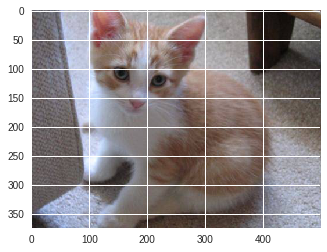

In [14]:
# yay, kitty!!! 
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [0]:
# lets learn
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

In [0]:
# too bad the timing widgets do not persist
learn.fit(0.01, 2)

In [0]:
# This is the label for a val data
data.val_y

In [0]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

In [0]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")


In [0]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")


In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)


In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")


In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")


In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")


In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")


In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
lrf=learn.lr_find()

In [0]:
learn.sched.plot_lr()


In [0]:
learn.sched.plot()


In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)


In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

In [0]:
plots(ims, rows=2)


In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)


In [0]:
learn.fit(1e-2, 1)


In [0]:
learn.precompute=False


In [0]:
learn.fit(1e-2, 3, cycle_len=1)


In [0]:
learn.sched.plot_lr()


In [0]:
learn.save('/tmp/224_lastlayer')


In [0]:
learn.unfreeze()


In [0]:
lr=np.array([1e-4,1e-3,1e-2])


In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)


In [0]:
#too impatient ...
learn.sched.plot_lr()


In [0]:
len(data.trn_ds.fnames)

In [0]:
!ls data/dogscats/train/dogs/ | wc -l